## Project #1


```
Alexander Baquiax
PIO | Econometría II
12007988
```


In [76]:
import numpy as np
import pandas as pd 

In [77]:
colum_names=['price', 'quality', 'ffsf', "rooms", "built", "lotfrontage"]
raw = np.load('data/data.npy')

In [78]:
dataset = pd.DataFrame(raw, columns=colum_names)
dataset.head().append(dataset.tail())

,price,quality,ffsf,rooms,built,lotfrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0
1459,147500.0,5.0,1256.0,6.0,1965.0,75.0


In [79]:
trainging_set_size = int(len(dataset) * 0.8)
trainging_set_size

1168

In [80]:
training_set = pd.DataFrame(dataset.values[:int(trainging_set_size)], columns=colum_names)
training_set.head().append(training_set.tail())


,price,quality,ffsf,rooms,built,lotfrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0
1167,173000.0,6.0,959.0,7.0,2000.0,58.0


In [81]:
testing_set = pd.DataFrame(dataset.values[trainging_set_size:], columns=colum_names)
testing_set.head().append(testing_set.tail())

,price,quality,ffsf,rooms,built,lotfrontage
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0
287,175000.0,6.0,953.0,7.0,1999.0,62.0
288,210000.0,6.0,2073.0,7.0,1978.0,85.0
289,266500.0,7.0,1188.0,9.0,1941.0,66.0
290,142125.0,5.0,1078.0,5.0,1950.0,68.0
291,147500.0,5.0,1256.0,6.0,1965.0,75.0


In [82]:
dataset.describe()

,price,quality,ffsf,rooms,built,lotfrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [109]:
data = []
for colname in dataset.columns:
    column = dataset[colname]
    range = column.max() - column.min()
    data.append([colname, column.mean(), column.max(), column.min(), range, column.std()])

result = pd.DataFrame(data, columns=['variable', 'mean', 'max', 'min', 'range', 'std'])

result.head(6)
    

,variable,mean,max,min,range,std
0,price,180921.195890,755000.0,34900.0,720100.0,79442.502883
1,quality,6.099315,10.0,1.0,9.0,1.382997
2,ffsf,1162.626712,4692.0,334.0,4358.0,386.587738
3,rooms,6.517808,14.0,2.0,12.0,1.625393
4,built,1971.267808,2010.0,1872.0,138.0,30.202904
5,lotfrontage,70.049958,313.0,21.0,292.0,24.284752


### 4. Histogramas


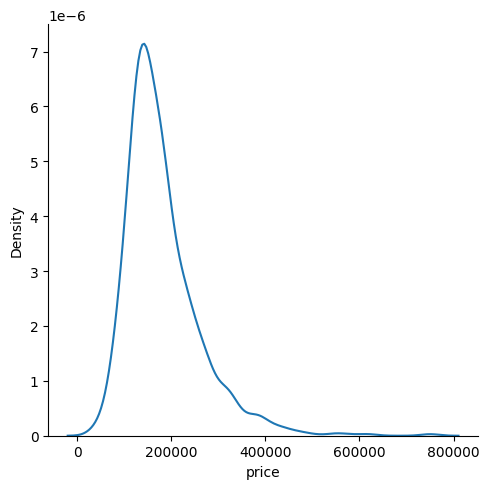

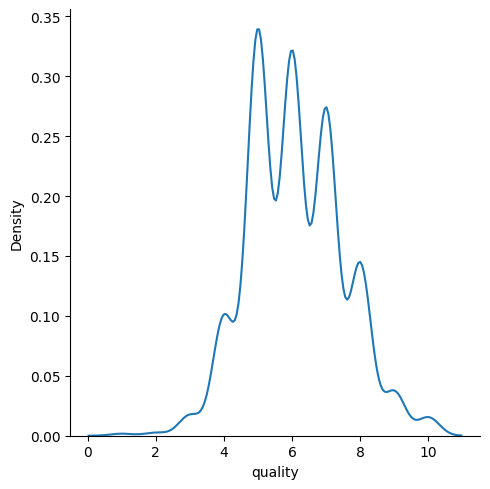

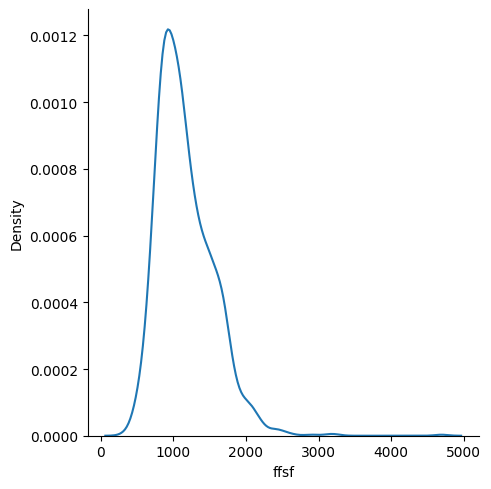

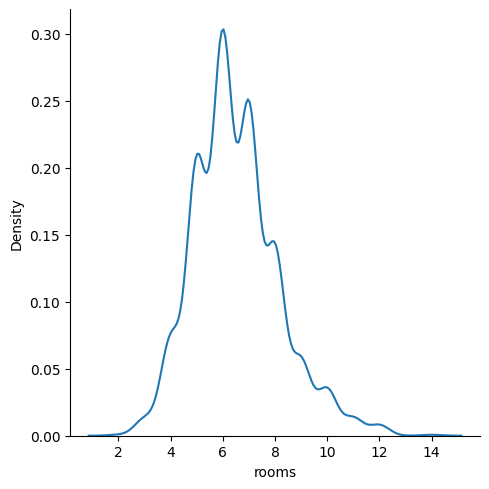

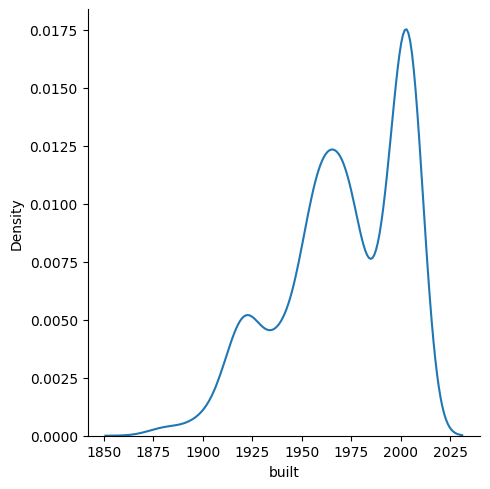

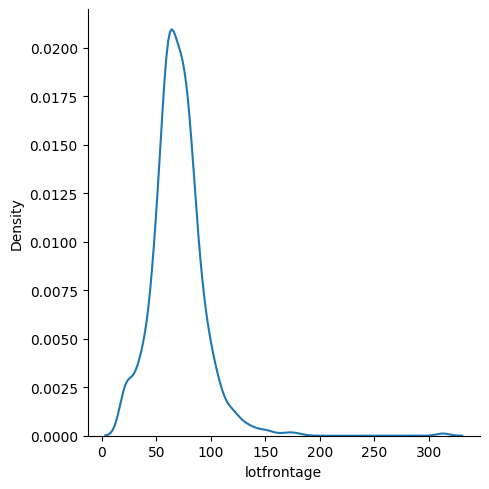

In [118]:
### 4. Histogramas
import seaborn as sns 

for colname in dataset.columns:
    sns.displot(dataset[colname],kind="kde")